In [1]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sknn.platform import cpu64, threads2
from sknn.mlp import Classifier, Layer
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import BernoulliRBM
from sklearn.cross_validation import train_test_split
from sklearn import linear_model, datasets, metrics
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.externals.six import StringIO  
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.learning_curve import learning_curve

from time import time
import pydot 
import MySQLdb
%matplotlib inline

In [2]:
pitches = pd.read_csv('pitchdata.csv',header=None)
x_train, x_test, y_train, y_test = train_test_split(pitches[pitches.columns[:27]], pitches[27], test_size=.2, random_state=42)

In [24]:

iterations = 1000
lc = np.zeros([iterations,3])

for x in range(iterations):
    l = Layer("Rectifier", units=4)
    nn =    Classifier(layers=[l,
                               Layer('Softmax')],
            random_state=42,
            learning_rate=0.01,
            learning_rule='sgd',
            learning_momentum=0.5,
            batch_size=50,
            valid_size=0.2,
            n_stable=100,
            n_iter=x,
            verbose=False)
    t0= time()
    nn.fit(x_train.as_matrix(), y_train)

    output = nn.predict_proba(x_test.as_matrix())[:,1]
    output_train = nn.predict_proba(x_train.as_matrix())[:,1]

    lc[x,0] = x
    lc[x,1] = mean_squared_error(y_test,output)*.5
    lc[x,2] = mean_squared_error(y_train,output_train)*.5
#     lc[x,1] = accuracy_score(y_test,output)
#     lc[x,2] = accuracy_score(y_train,output_train)

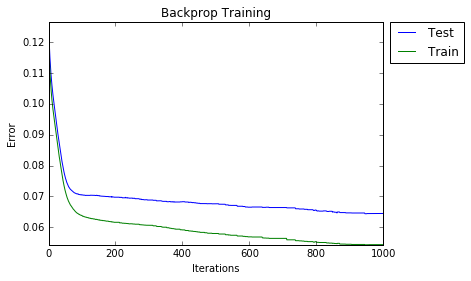

In [327]:

plt.plot(lc[:,0], lc[:,1],label='Test')
plt.plot(lc[:,0], lc[:,2], label='Train')
plt.ylim([lc[:,1:].min(),lc[:,1:].max()])
plt.xlim([1,lc.shape[0] ])
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.title('Backprop Training')
plt.show()

In [25]:

output = nn.predict(x_test.as_matrix())
print metrics.classification_report(y_test,output)

             precision    recall  f1-score   support

          0       0.81      0.77      0.79      1050
          1       0.78      0.82      0.80      1053

avg / total       0.80      0.80      0.80      2103



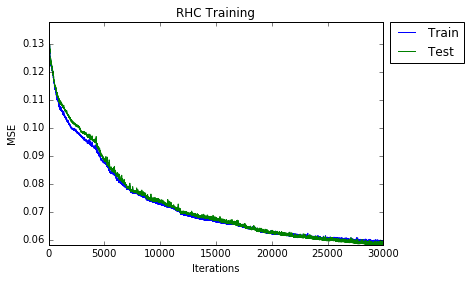

In [40]:
rhc_pd = pd.read_csv('./csvs/Keep/1457908217457.csv',header=None)
rhc = rhc_pd.as_matrix()

plt.plot(rhc[:,0], rhc[:,1],label='Train')
plt.plot(rhc[:,0], rhc[:,2], label='Test')
plt.ylim([rhc[:,1:].min(),rhc[:,1:].max()])
plt.xlim([1,rhc.shape[0] ])
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.title('RHC Training')
plt.show()

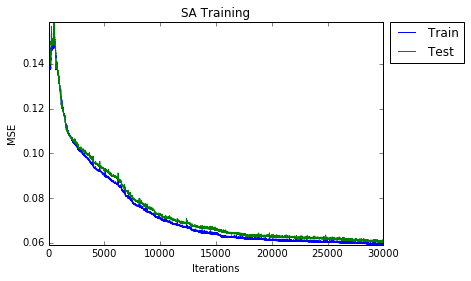

In [38]:
sa_pd = pd.read_csv('./csvs/Keep/1457909171139.csv',header=None)
sa = sa_pd.as_matrix()


plt.plot(sa[:,0], sa[:,1],label='Train')
plt.plot(sa[:,0], sa[:,2], label='Test')
plt.ylim([sa[:,1:].min(),sa[:,1:].max()])
plt.xlim([1,sa.shape[0] ])
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.title('SA Training')
plt.show()

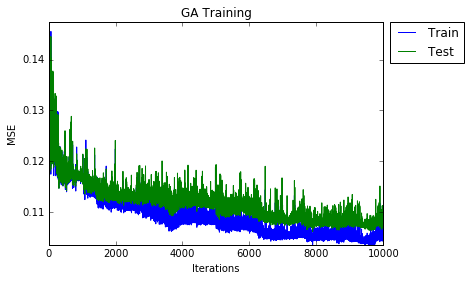

In [31]:
ga_pd = pd.read_csv('./csvs/Keep/1457619455587.csv',header=None)
ga =ga_pd.as_matrix()

plt.plot(ga[:,0], ga[:,1],label='Train')
plt.plot(ga[:,0], ga[:,2], label='Test')
plt.ylim([ga[:,1:].min(),ga[:,1:].max()])
plt.xlim([1,ga.shape[0] ])
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.title('GA Training')
plt.show()

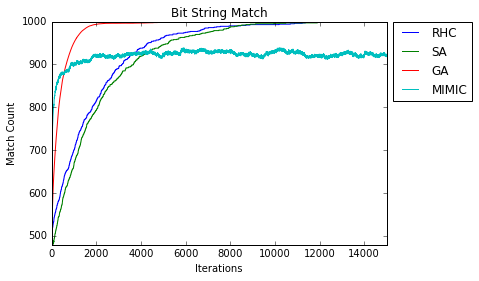

In [32]:
rhc = pd.read_csv('./csvs/Keep/1457667461504.csv',header=None).as_matrix()
sa = pd.read_csv('./csvs/Keep/1457695199229.csv',header=None).as_matrix()
ga = pd.read_csv('./csvs/Keep/1457695650962.csv',header=None).as_matrix()
mimic = pd.read_csv('./csvs/Keep/1457667958005.csv',header=None).as_matrix()
rhc[:,1]=rhc[:,1]**.25
sa[:,1]=sa[:,1]**.25
ga[:,1]=ga[:,1]**.25
mimic[:,1]=mimic[:,1]**.25
rhc=rhc[:15000,:]
plt.plot(rhc[:,0], rhc[:,1],label='RHC')
plt.plot(sa[:,0], sa[:,1],label='SA')
plt.plot(ga[:,0], ga[:,1],label='GA')
plt.plot(mimic[:,0], mimic[:,1],label='MIMIC')
plt.ylim([sa[:,1].min(),sa[:,1].max()])
plt.xlim([1,rhc.shape[0] ])
plt.xlabel('Iterations')
plt.ylabel('Match Count')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.title('Bit String Match')
plt.show()

/home/harry/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


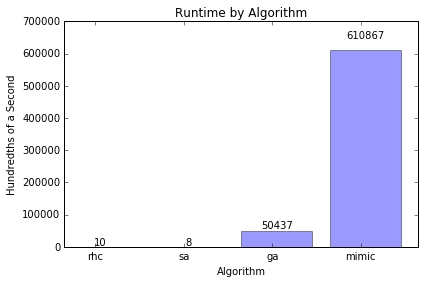

In [33]:
times=(rhc[:,2].max()/10,sa[:,2].max()/10,ga[:,2].max()/10,mimic[:,2].max()/10)
labels=('rhc','sa','ga','mimic')

n_groups = 4

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, times,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config)

plt.xlabel('Algorithm')
plt.ylabel('Hundredths of a Second')
plt.title('Runtime by Algorithm')
plt.xticks(index + bar_width,labels)
plt.legend()

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()*1.00 + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.tight_layout()
plt.show()

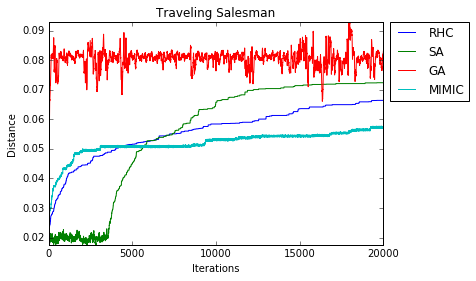

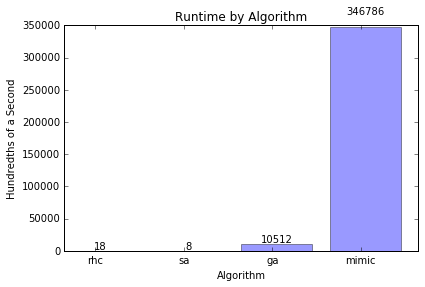

In [34]:
rhc = pd.read_csv('./csvs/Keep/1457700925469.csv',header=None).as_matrix()
sa = pd.read_csv('./csvs/Keep/1457700925655.csv',header=None).as_matrix()
ga = pd.read_csv('./csvs/Keep/1457700925753.csv',header=None).as_matrix()
mimic = pd.read_csv('./csvs/Keep/1457701031180.csv',header=None).as_matrix()
rhc=rhc[:20000,:]
plt.plot(rhc[:,0], rhc[:,1],label='RHC')
plt.plot(sa[:,0], sa[:,1],label='SA')
plt.plot(ga[:,0], ga[:,1],label='GA')
plt.plot(mimic[:,0], mimic[:,1],label='MIMIC')
plt.ylim([sa[:,1].min(),ga[:,1].max()])
plt.xlim([1,rhc.shape[0] ])
plt.xlabel('Iterations')
plt.ylabel('Distance')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.title('Traveling Salesman')
plt.show()


times=(rhc[:,2].max()/10,sa[:,2].max()/10,ga[:,2].max()/10,mimic[:,2].max()/10)
labels=('rhc','sa','ga','mimic')

n_groups = 4

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, times,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config)

plt.xlabel('Algorithm')
plt.ylabel('Hundredths of a Second')
plt.title('Runtime by Algorithm')
plt.xticks(index + bar_width,labels)
plt.legend()

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()*1.00 + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.tight_layout()
plt.show()

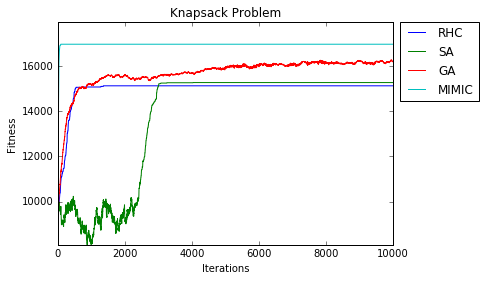

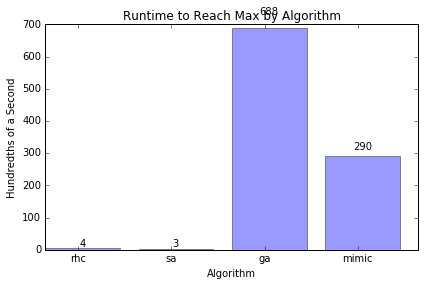

In [37]:
rhc = pd.read_csv('./csvs/Keep/1457794070196.csv',header=None).as_matrix()
sa = pd.read_csv('./csvs/Keep/1457794070288.csv',header=None).as_matrix()
ga = pd.read_csv('./csvs/Keep/1457794070365.csv',header=None).as_matrix()
mimic = pd.read_csv('./csvs/Keep/1457794077447.csv',header=None).as_matrix()
plt.plot(rhc[:,0], rhc[:,1],label='RHC')
plt.plot(sa[:,0], sa[:,1],label='SA')
plt.plot(ga[:,0], ga[:,1],label='GA')
plt.plot(mimic[:,0], mimic[:,1],label='MIMIC')
plt.ylim([sa[:,1].min(),mimic[:,1].max()+1000])
plt.xlim([1,rhc.shape[0] ])
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.title('Knapsack Problem')
plt.show()


times=(rhc[rhc[:,1].argmax(),2]/10,sa[sa[:,1].argmax(),2]/10,ga[ga[:,1].argmax(),2]/10,mimic[mimic[:,1].argmax(),2]/10)
labels=('rhc','sa','ga','mimic')

n_groups = 4

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, times,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config)

plt.xlabel('Algorithm')
plt.ylabel('Hundredths of a Second')
plt.title('Runtime to Reach Max by Algorithm')
plt.xticks(index + bar_width,labels)
plt.legend()

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()*1.00 + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.tight_layout()
plt.show()

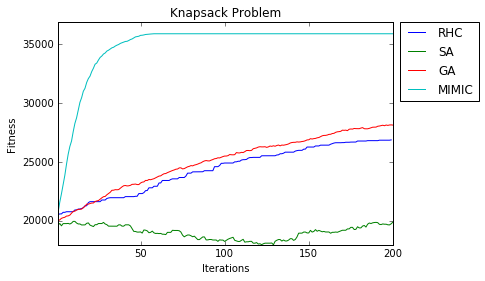

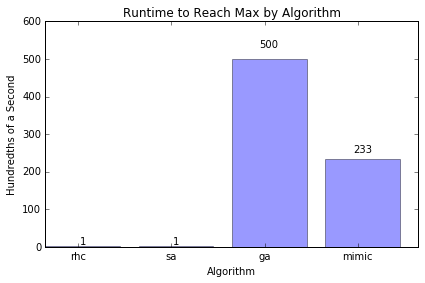

In [36]:
rhc = pd.read_csv('./csvs/1457813227232.csv',header=None).as_matrix()
sa = pd.read_csv('./csvs/1457813227334.csv',header=None).as_matrix()
ga = pd.read_csv('./csvs/1457813227374.csv',header=None).as_matrix()
mimic = pd.read_csv('./csvs/1457813234667.csv',header=None).as_matrix()
rhc=rhc[:200,:]
plt.plot(rhc[:,0], rhc[:,1],label='RHC')
plt.plot(sa[:,0], sa[:,1],label='SA')
plt.plot(ga[:,0], ga[:,1],label='GA')
plt.plot(mimic[:,0], mimic[:,1],label='MIMIC')
plt.ylim([sa[:,1].min(),mimic[:,1].max()+1000])
plt.xlim([1,rhc.shape[0] ])
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.title('Knapsack Problem')
plt.show()



times=(rhc[rhc[:,1].argmax(),2]/10,sa[sa[:,1].argmax(),2]/10,ga[ga[:,1].argmax(),2]/10,mimic[mimic[:100,1].argmax(),2]/10)
labels=('rhc','sa','ga','mimic')

n_groups = 4

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, times,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config)

plt.xlabel('Algorithm')
plt.ylabel('Hundredths of a Second')
plt.title('Runtime to Reach Max by Algorithm')
plt.xticks(index + bar_width,labels)
plt.legend()

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()*1.00 + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.tight_layout()
plt.show()

In [340]:
mimic[:1000,1].argmax()

58

In [272]:
rhc[rhc[:,1].argmax(),2]

41.0